### MNIST data

- This dataset contains 60,000 traning images and 10,000 test images and these are of 10 digits 0 to 9. Handwritten digits. People used some networks in banks to classify or understnd the cheques.

- For learning purposes, MNIST dataset is also part of our tensorflow package, hence we need not read from excel

In [1]:
import tensorflow
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing data using load data method ,since we have good amount of data we will load it as 
#traning and testing

In [3]:
# from tensorflow.keras.datasets import mnist
# mnist.load_data

In [4]:
(X_train,y_train),(X_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [5]:
print("No of traning examples",X_train.shape[0])

No of traning examples 60000


In [6]:
print("No of testing examples",X_test.shape[0])

No of testing examples 10000


In [ ]:
#sample code 
# (features,price),_ = tensorflow.keras.datasets.boston_housing.load_data(test_split=0)
# features.shape
# features.shape[0]

label:8


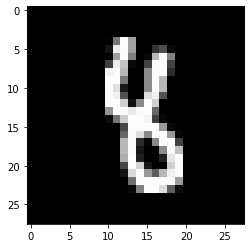

In [7]:
import matplotlib.pyplot as plt
print('label:{}'.format(y_train[7000]))
plt.imshow(X_train[7000],cmap='gray')

In [8]:
#printing the shape of the data

print("training images shape",X_train.shape)
print("testing image shape",X_test.shape)
print("Training target",y_train.shape)
print("Testing target",y_test.shape)


training images shape (60000, 28, 28)
testing image shape (10000, 28, 28)
Training target (60000,)
Testing target (10000,)


In [ ]:
#we are trying to classify digits from 0 - 9 


- how many neurons in my input layer - ? 784

- what is the loss function -?  cross entropy

- how many neurons in my last layer -?  10 




In [9]:
from tensorflow.keras.utils import to_categorical
print(y_train.shape)
print("Value before encoding",y_train[5])
print("Value before encoding",y_test[5])

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

print(y_train.shape)
print(y_train[5])
print(y_test[5])

(60000,)
Value before encoding 2
Value before encoding 1
(60000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
#Lets create the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Reshape


In [11]:
model = Sequential()
model.add(Reshape((784,), input_shape=(28,28,)))

#adding my first hidden layer
model.add(Dense(200,activation='relu'))
#second hidden layer
model.add(Dense(100,activation='relu'))
#third hidden layer
model.add(Dense(60,activation='relu'))
#fourth hidden layer
model.add(Dense(30,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
#Model is just compiled, model has random weights initialized by tensorflow
#lets see how much accuracy model will get without training
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 659us/step - loss: 67.1087 - accuracy: 0.0919


[67.10870361328125, 0.09189999848604202]

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,y_test) , epochs=30,batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6353 - accuracy: 0.8726 - val_loss: 0.2629 - val_accuracy: 0.9281
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2000 - accuracy: 0.9428 - val_loss: 0.1739 - val_accuracy: 0.9527
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1494 - accuracy: 0.9581 - val_loss: 0.1579 - val_accuracy: 0.9570
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1199 - accuracy: 0.9659 - val_loss: 0.1265 - val_accuracy: 0.9663
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1039 - accuracy: 0.9703 - val_loss: 0.1465 - val_accuracy: 0.9598
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0911 - accuracy: 0.9739 - val_loss: 0.1227 - val_accuracy: 0.9683
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0778 - accuracy: 0.9772 - val_loss: 0.1036 - val_accuracy:

In [ ]:
# Understand Dropout
# Understand Regularization
# Implement Early stopping
# Use the hyper parameters called learning rate and momentum
